# Pizza Rush 

### Por: Bruno Porto e Lucca Gandra
---


## 1 Motivação e ideia ##

Ser garçonete é difícil. Não ser inconveniente e ao mesmo tempo atender a maior quantidade de pessoas é uma habilidade extremamente subestimada. Então, a pergunta é: qual é a melhor estratégia para obter uma maior satisfação média das mesas em um restaurante? Este é um projeto feito para a aula de Introdução à Otimização do professor Amit Bhaya - UFRJ. Observe que este problema pode ser aplicado à logística do mundo real, onde mesas, garçonetes e pizzarias podem ser trocadas por clientes, caminhões e produtos, respectivamente.

A motivação da ideia surgiu em um momento grande de espera pelo atendimento em uma pizzaria do Rio de Janeiro. A pergunta portanto é: quanto, em mão de obra desnecessária é desperdiçada pela falta de otimização de garçons? E mais, se a satisfação do cliente é essencial pro sucesso de uma franquia de pizzarias, quanto é desperdiçado pela falta de um atendimento rápido e otimizado?

Portanto, este projeto visa pegar um set de mesas dentro de um restaurante rodízio e otimizar os caminhos que devem ser feitos pelo garçom para que se obtenha uma maior satisfação dos clientes, de forma que os clientes que recém chegaram no estabelecimento sejam atendidos primeiro porém não deixando de atender mesas que já estão a mais tempo. Caso uma mesa passe muito tempo sem ser atendida a satisfação do cliente decai fazendo que ele não dê gorjetas ao sair do estabelecimento, porém se sua satisfação for alta ele dará gorjetas altas.
Este problema será abordado com um sistema onde o restaurante vai estar em 50% de sua capacidade e que com o tempo o nível de clientes vai aumentando para verificar a diminuição da eficácia do garçom. Os resultados se darão ao final do número de iterações necessárias para manter o restaurante na capacidade máxima. 


## 2. Modelo matemático ##
<!-- 
Esta seção deve conter uma discussão das hipóteses de modelagem feitas no problema (conforme a origem do problema: física? economia? redes sociais? ...). Explique a escolha das variáveis de decisão, as restrições e a função objetivo. Finalmente, mostre o problema de otimização escrite em forma padrão. Discute o tipo de modelo adotado (LP, QP, MIP, etc.). Equações devem ser formatadas em $\LaTeX$ dentro do notebook Julia. Nesta seção, pode supor que **o leitor está familiarizado com a matéria"**.

Eis um exemplo de quadrante_1a equação: -->





Este problema que foi idealizado é um problema baseado definição de nós, diferente do caixeiro viajante que já tem os pontos que ele tem que passar para fazer o ciclo, pois nele não importa o caminho que o garçom faça nas mesas, o que basta é quais mesas ele deve atender para assim então maximizar a satisfação dos clientes, a variavel de decisão vai ser pontos X[i, j] dentro de uma matriz que vai ser 4x4 representando as mesas de um restaurante(não importando a capacidade dela), esses pontos dentro da matriz vão ser binarios, significando que aquela mesa deve ser atendida ou não, e cada mesa vai ter sua representação de sua satisfação, para assim então mudar os custos de acordo com o nível de decaimento de cada satisfação, vamos considerar a quantidade de fatias que o garçom tem em mãos para entregar para os clientes. Levando esses fatores em consideração temos as seguintes restrições: 
- se a satisfação estiver entre 5 e 3 a mesa pega uma fatia 
- se for menor ou igual a 3 a mesa pega duas fatias, dessa maneira, afetando a quantidade de mesas que podem ser atendidas
- O garçom não pode atender mesas vazias 
- A quantidade de mesas que ele escolher passar deve estar em concordância com a quantidade de pizzas que ele tem em suas mãos
 
Nestas restrições teremos 3 matrizes, a primeira representando a satisfação, a segunda representando o custo e a terceira representando as pizzas requisitadas pela mesa, que serão mais ou menos assim:

$$
S_{ij} =
\begin{bmatrix}
  0 & 0 & 5 & 5 \\
  0 & 5 & 0 & 5 \\
  0 & 0 & 5 & 5 \\
  0 & 5 & 0 & 5
\end{bmatrix}

$$


$$
C_{ij} =
\begin{bmatrix}
  0 & 0 & 1 & 1 \\
  0 & 1 & 0 & 1 \\
  0 & 0 & 1 & 1 \\
  0 & 1 & 0 & 1
\end{bmatrix}

$$

$$
P_{ij} =
\begin{bmatrix}
  0 & 0 & 1 & 1 \\
  0 & 1 & 0 & 1 \\
  0 & 0 & 1 & 1 \\
  0 & 1 & 0 & 1
\end{bmatrix}

$$


E por fim, o objetivo é que no final de cada rodada o garçom maximize a satisfação com uma escolha de mesas a serem atendidas que estejam dentro da capacidade de pizza


A matriz da escolha do garçom com 4 pizzas no começo de uma primeira rodada vai ser mais ou menos assim assim:

$$
X_{ij} =
\begin{bmatrix}
  0 & 0 & 1 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 1 & 0 & 0
\end{bmatrix}
% \begin{bmatrix} x \\ y \end{bmatrix} =
% \begin{bmatrix} 5 \\ 6 \end{bmatrix}
$$

Isso pois não interessa muito a escolha de mesas iniciais pois todas elas darão o mesmo resultado de satisfação, Porém na segunda rodada já terá um cliente novo que obrigatoriamente deve ser atendido pelo garçom, logo a segunda rodada será mais ou menos assim:

$$
X_{ij} =
\begin{bmatrix}
  1 & 0 & 0 & 1 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 0 & 0
\end{bmatrix}

$$

E assim por diante...



Modelo matemático das restrições:

$$

\sum_{i=1}^{4}\sum_{j =1}^{4} X_{ij}*P_{ij} = Pizzas \\~\\
\left\{P_{ij} - X_{ij} \le 0 ; i = 1:4, j = 1:4\right\}\\~\\

$$

Onde C é o custo e S é a solução encontrada

O modelo matemático do objetivo:


$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& \sum_{i=1}^{4}\sum_{j =1}^{4} X_{ij} \\
& \sum_{i=1}^{4}\sum_{j =1}^{4} X_{ij}*P_{ij} = Pizzas \\
& \left\{P_{ij} - X_{ij} \le 0 ; i = 1:4, j = 1:4\right\}\\
 
\end{aligned}
$$

Para observar todo nosso processo de criação, basta entrar em nosso [GitHub](https://github.com/luccagandra/pizza-rush).
<!-- 
Para algumas dicas rápidas sobre a utilizção de $\LaTeX$, veja [este cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf). -->

## 3. Solução ##

Nesta seção, coloque seu código em Julia + JuMP e resolva o problema proposto. Seu código deve ser limpo (não macarrônico!), de fácil leitura, bem comentado e anotado e deve compilar sem erros em Julia 1.x, x$\geq 1$! Não valem códigos em outras linguagens. **Vou rodar seu código para avaliar seu projeto**. Sugiro a utilização de múltiplos blocos de códigos separados por blocos de texto (células Markdown) explicando as várias partes da sua solução. Sugiro também a resolução de várias versões do seu problema, com modelos e hipóteses diferentes.

É permitido chamar pacotes externos, mas evite a utilização de bibliotecas exóticas (pois, em geral, não rodam em todas as versões de Julia, e terei que instalar a mesma versão que você usou, ou rodar na plataforma Google Colab, que gostaria de evitar).



### 3.1. Imports


In [3796]:
#=
import Pkg

Pkg.add("IJulia")
Pkg.add("JuMP")
Pkg.add("Clp")
Pkg.add("Cbc")
Pkg.add("LinearAlgebra")
Pkg.add("Ipopt")
Pkg.add("Images")
Pkg.add("ImageView")
Pkg.add("StatsBase")
Pkg.add("Combinatorics")
=#

using JuMP
using Clp
using Cbc
using LinearAlgebra
using Ipopt
using Images, ImageView, StatsBase
using Combinatorics
using Plots

### 3.2. Criação das variáveis e principais matrizes

In [3797]:
tamanho_grid = 4
iteration_count = 0

img_rgb = rand(RGB, tamanho_grid, tamanho_grid)

# Torna 50% das mesas vazias
empty_tables = sample(1:length(img_rgb), Integer(length(img_rgb)/2), replace = false)

for i in eachindex(img_rgb)
    if i in empty_tables
        img_rgb[i] = RGB(1.0, 1.0, 1.0) # Mesas brancas
    else    
        img_rgb[i] = RGB(0.0, 1.0, 0.0) # Mesas verdes
    end
end

ImageView.imshow(img_rgb) # como o restaurante está

iteration = Vector{Float64}()
list_median_satisfaction = Vector{Float64}()

satisfaction = zeros(4,4)

i = 1
j = 1
# cria uma matriz 4x4 que define a satisfacao de cada mesa
for it in img_rgb
    if it == RGB{Float64}(0.0,1.0,0.0)
        satisfaction[i,j] = 5
    end
    if i == tamanho_grid
        i = 0
        j = j+1
    end
    if  i != tamanho_grid
        i=i+1
    end
end

print("Soma satisfação: ", sum(satisfaction[i,j] for i=1:4, j=1:4), "\n")


i = 1
j = 1

# cria uma matriz  4x4 que define o custo de cada mesa 

satisfaction = transpose(satisfaction)

Soma satisfação: 40.0


4×4 Transpose{Float64,Array{Float64,2}}:
 5.0  5.0  5.0  0.0
 5.0  0.0  5.0  5.0
 0.0  0.0  0.0  0.0
 5.0  0.0  5.0  0.0

### 3.3. Criação da matriz que contém todos os caminhos possíveis 

In [3798]:
imagem_dos_caminhos = rand(RGB, tamanho_grid, tamanho_grid)

# Torna 50% das mesas vazias

# Crio todos os caminhos possiveis de se fazer quando voce está em um ponto, impedindo que você atravesse o restaurante em um unico movimento

custo_simples = zeros(tamanho_grid,tamanho_grid)
pizzas_requisitadas = zeros(tamanho_grid,tamanho_grid)
pizzas = 12
mesas_vazias = zeros(tamanho_grid,tamanho_grid)

interação = 1
for i in satisfaction
    print(i)
    if 4<= i <= 5.0
    pizzas_requisitadas[interação] = 1
    elseif 0< i<= 3
        pizzas_requisitadas[interação] = 2
    end
    interação = interação+1
end



interação = 1
for i in satisfaction
    print(i)
    if  i == 5.0
    custo_simples[interação] = 1
    elseif i == 4.0
        custo_simples[interação] = 3
    elseif i == 3.0
        custo_simples[interação] = 5
    elseif i == 2.0
        custo_simples[interação] = 7
    elseif i == 1.0
        custo_simples[interação] = 9
    end
    interação = interação+1
end

print(custo_simples)


if length(findall(a->a==1, custo_simples)) <= pizzas
    pizzas = length(findall(a->a==1, custo_simples))

end

5.05.00.05.05.00.00.00.05.05.00.05.00.05.00.00.05.05.00.05.05.00.00.00.05.05.00.05.00.05.00.00.0[1.0 1.0 1.0 0.0; 1.0 0.0 1.0 1.0; 0.0 0.0 0.0 0.0; 1.0 0.0 1.0 0.0]

8

### 3.4. Otimização do trajeto

Para mais iterações do trajeto, rode todas as células daqui para baixo

In [3799]:
n = tamanho_grid

nmodel =  Model(Cbc.Optimizer)
@variable(nmodel, x[1:n, 1:n], Bin) # mesas que vao ser escolhidas para serem atendidas 
@objective(nmodel,  Max, sum(x[i,j]*custo_simples[i,j] for i = 1:n, j=1:n)) #objetivo de maximizar o custo (note que o custo aumenta conforme a satisfação diminui, logo maximizar o custo é o mesmo de maximizar a satisfação)
@constraint(nmodel, sum(x[i,j] for i = 1:n, j=1:n) >=  0)
@constraint(nmodel, [i=1:n, j=1:n], pizzas_requisitadas[i,j]-x[i,j]>= 0) # essa retrição impossibilita ele de atender mesas vazias
@constraint(nmodel, cliente1, sum(x[i,j]*pizzas_requisitadas[i,j] for i = 1:n, j=1:n) == pizzas)# essa restrição limita a quantidade de mesas a serem atendidas

optimize!(nmodel)

W = value.(x)


# W = value.(x)


Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 8 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -8 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Knapsack was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Clique was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
MixedIntegerRounding2 was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
FlowCover was tried 0 times and created

4×4 Array{Float64,2}:
 1.0  1.0  1.0  0.0
 1.0  0.0  1.0  1.0
 0.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0

### 3.4.1. Troubleshooting

In [3800]:
findall(l->l==1, W)

lista_1 = []
lista_2 = []
lista_a = []
lista_b = []
lista_c = []
for i in findall(a -> a == 1, W)
    print()
    pato = ((i[1]-1)*4)+i[2]
    push!(lista_1, pato)
    push!(lista_2, i[2])
    push!(lista_b, i[1])
    push!(lista_c, i[2])
end

lista_a = [lista_1]

print("Todas as mesas que o garçom passou: \n", lista_a)

for i in 1:16
    if i ∉ lista_a[1] && transpose(satisfaction)[i] != 0 && transpose(satisfaction)[i] != 1 
        transpose(satisfaction)[i] = transpose(satisfaction)[i] -1
    elseif i ∉ lista_a[1] && transpose(satisfaction)[i] == 1
        transpose(satisfaction)[i] = transpose(satisfaction)[i] -2
    elseif i in lista_a[1]
        transpose(satisfaction)[i] = 5
    end
end

findall(l->l==1, W)

satisfaction

Todas as mesas que o garçom passou: 
Array{Any,1}[[1, 5, 13, 2, 3, 7, 15, 8]]

4×4 Transpose{Float64,Array{Float64,2}}:
 5.0  5.0  5.0  0.0
 5.0  0.0  5.0  5.0
 0.0  0.0  0.0  0.0
 5.0  0.0  5.0  0.0

In [3801]:
# Loop geral

# Acertar satisfação depois de uma iteração 
 
img_tables_passed = rand(RGB, tamanho_grid, tamanho_grid)

# Gráfico de satisfação
for (i, value) in enumerate(transpose(satisfaction))

    img_tables_passed[i] = RGB{Float64}(1.0, 1.0, 1.0)
    
    if Integer(value) == 5
        img_rgb[i] = RGB{Float64}(0.0, 1.0, 0.0)
    elseif Integer(value) == 4 
        img_rgb[i] = RGB{Float64}(0.5, 1.0, 0.0)
    elseif Integer(value) == 3 
        img_rgb[i] = RGB{Float64}(1.0, 1.0, 0.0)
    elseif Integer(value) == 2 
        img_rgb[i] = RGB{Float64}(1.0, 0.5, 0.0)
    elseif Integer(value) == 1 
        img_rgb[i] = RGB{Float64}(1.0, 0.0, 0.0)
    elseif Integer(value) == 0 
        img_rgb[i] = RGB{Float64}(1.0, 1.0, 1.0) 
    elseif Integer(value) == -1
        img_rgb[i] = RGB{Float64}(0.0, 0.0, 0.0) 
    end
end

count = 0
for i in lista_a[1]
    if count == 0
        img_tables_passed[i] = RGB{Float64}(1.0, 0.0, 0.0)
        count = 1
    else
        img_tables_passed[i] = RGB{Float64}(0.0, 0.0, 1.0)
    end
end

ImageView.closeall()
ImageView.imshow(transpose(img_rgb))
ImageView.imshow(transpose(img_tables_passed))

iteration_count += 1

if iteration_count <= 9
    non_empty_tables = 9 - iteration_count 
end

#print("\n\nNon empty tables", non_empty_tables)

total = 0

for i in 1:16
    if satisfaction[i] == -1
        total = total+0
    else
        total = total + satisfaction[i]
    eendend

append!(list_median_satisfaction, total/(16 - non_empty_tables))
append!(iteration, iteration_count)
# Adicionar um cliente a cada nova iteração (redução de uma mesa vazia) --> NOVO LOOP




satisfaction
interation = 1

for i in satisfaction
    if 4<= i <= 5.0
    pizzas_requisitadas[interation] = 1
    elseif 0< i<= 3
        pizzas_requisitadas[interation] = 2
    end
    interation = interation+1
end

interation = 1
for i in satisfaction
    
    if  i == 5.0
    custo_simples[interation] = 1
    elseif i == 4.0
        custo_simples[interation] = 3
    elseif i == 3.0
        custo_simples[interation] = 10
    elseif i == 2.0
        custo_simples[interation] = 18
    elseif i == 1.0
        custo_simples[interation] = 100
    end
    interation = interation+1
end

mesa_nova = 0

for i in 1:16
    if satisfaction[i] == 0
        satisfaction[i] = 5
        mesa_nova = i
        custo_simples[mesa_nova] = 100000
        pizzas_requisitadas[mesa_nova] = 1
        break
    end
end

# print(custo_simples)


## 4. Resultados e discussão ##

### 4.1. Resultados

Satisfação média atual: 5.0

Satisfação ao longo das iterações: 
[5.0]

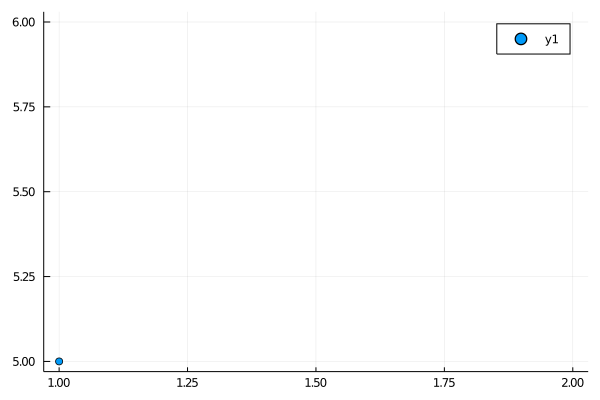

In [3802]:
# Resultados -> Favor passar várias iterações em 3.4.

print("Satisfação média atual: ", total/(16 - non_empty_tables), "\n")
print("\nSatisfação ao longo das iterações: \n", list_median_satisfaction)
scatter(iteration, list_median_satisfaction)

Caso tenha poucas iterações, seu resultado estará em uma decrescente suave, isso pois o garçom ainda dá conta de atender a demanda, mas não a quantidade imensa de clientes que virão após.

Caso tenha muitas iterações (>12), verá um decréscimo rápido da satisfação do estabelecimento, porque supomos que clientes insatisfeitos pegam mais pedaços de pizzas pela fome e pelo fato de que um aumento de insatisfação em um cliente já aflito é mais grave do que em um bem servido.

### 4.2. Discussão dos resultados (após 100 iterações)

#### Capacidade de 4 pizzas:
Satisfação final dos clientes do restaurante:

Trajeto final feito:

Plot de satisfação ao longo de iterações:

#### Capacidade de 8 pizzas:
Satisfação final dos clientes do restaurante:

Trajeto final feito:

Plot de satisfação ao longo de iterações:

#### Capacidade de 12 pizzas:
Satisfação final dos clientes do restaurante:

Trajeto final feito:

Plot de satisfação ao longo de iterações:

## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.

### 5.1. Comentários sobre o desenvolvimento

Tivemos, no decorrer do projeto, métodos alternativos de resolução com o objetivo de aproximar o problema da realidade ou de tornar o trabalho mais fácil. Contudo, até a apresentação final, pela falta de tempo e dificuldade de solucionar as questões envolvidas, chegamos à esta abordagem.

Disso, pensamos inicialmente em um restaurante que continha espaços vazios no qual o garçom poderia se locomover e mesas fixas com satisfações variáveis. Dessa forma, teríamos que solucionar um problema do caixeiro viajante ao mesmo tempo que priorizávamos mesas com satisfação alta ou baixa. Não o fizemos pela alta complexidade de resolução do problema do caixeiro viajante e pela falta de recusos para a criação de um grid que fosse bem visualizado em Julia. Isso porque o ImageView não tinha componentes necessários para manipular a imagem da maneira que queríamos. Um problema parecido com este no mundo real é a existência de alternativas de entregas mais rápidas por empresas de logística (Delivery Prioritário). Nossa solução modelaria isso.

Depois, optamos por tornar todos os pixels da imagem como mesas acessáveis. Isso foi pensado para facilitar a resolução e pela noção de que o garçom, caso passe perto de uma mesa, pode ser chamado por qualquer pessoa ao seu redor, tornando seu movimento por espaços vazios inútil. Apesar de parecer uma diminuição da beleza do problema, a abordagem tem aplicações importantes na vida real. Isso pois podemos dizer que qualquer problema de logística que conta com a priorização de grupos majoritários bem satisfeitos perante grupos minoritários menos servidos, pode ser modelado de tal maneira. Isso pois, pensando em um cenário de distribuição de móveis, o que valeria mais a pena: assumindo um estoque fixo e uma a impossibilidade de atender todos os pedidos, entregar 10x pedidos na cidade de São Paulo, com estoques a 30% ou 5x pedidos na cidade de Niterói, com estoques a 10%? Nossa abordagem soluciona este tipo de problema, no qual clientes insatisfeitos pela demora no restaurante são comparáveis a uma cidade com estoque baixo. Se cada passo que o garçom dá há uma diminuição na quantidade de pizzas, ele deve selecionar para onde anda com boa cautela e "decidir" para qual mesa ou mesas entregará suas pizzas e qual grupo minoritário de clientes ele irá omitir. 

Finalmente, após o desenvolvimento, notamos um problema que impossibilitaria ao garçom a capacidade de andar somente para mesas grudadas à qual ele está. Isso consumiu um tempo muito grande e, no final, optamos por não utilizar o compilado de códigos que solucionaria esse problema para focar na eficiência geral do projeto.

### 5.2. Possíveis aprimoramentos do projeto

